<a href="https://colab.research.google.com/github/BYRic-F/Data_practice/blob/main/Entrainement_certif_Pandas_Viz_Creneau_2_Pandas_DataViz_Revision_Certif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
import plotly.express as px

# Importation des données

In [100]:
# Importation des données des top repositorie de github
df = pd.read_csv('https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/refs/heads/main/datasets/Github_Project_Dataset.csv')

In [101]:
df.head(2)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24T15:56:17Z,JavaScript,290k,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24T15:40:21Z,JavaScript,112k,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap


# Part 1 : Etude du dataframe

In [102]:
# 1. Afficher les 10 premières lignes du dataset
df.head(10)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24T15:56:17Z,JavaScript,290k,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24T15:40:21Z,JavaScript,112k,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23T01:09:34Z,NaN,87.8k,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24T19:33:49Z,JavaScript,69.7k,NaN,https://github.com/facebook/react
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31T06:03:47Z,JavaScript,65.7k,visualization,https://github.com/d3/d3
5,getify,You-Dont-Know-JS,A book series on JavaScript. @YDKJS on twitter.,2017-06-23T10:42:36Z,JavaScript,62k,"book-series,javascript,training-materials,asyn...",https://github.com/getify/You-Dont-Know-JS
6,tensorflow,tensorflow,Computation using data flow graphs for scalabl...,2017-06-24T18:25:42Z,C++,61.6k,"tensorflow,python,machine-learning,deep-neural...",https://github.com/tensorflow/tensorflow
7,sindresorhus,awesome,Curated list of awesome lists,2017-06-24T17:26:02Z,NaN,60.7k,"lists,awesome,unicorns,resources,awesome-list",https://github.com/sindresorhus/awesome
8,vuejs,vue,"A progressive, incrementally-adoptable JavaScr...",2017-06-24T15:38:55Z,JavaScript,57.7k,"javascript,vue,framework,frontend",https://github.com/vuejs/vue
9,angular,angular.js,AngularJS - HTML enhanced for web apps!,2017-06-24T06:25:23Z,JavaScript,56.2k,NaN,https://github.com/angular/angular.js


In [103]:
# 2.1 Afficher les dimensions du dataset (nbr de lignes et de colonnes sous forme de tuple)
df.shape

(980, 8)

In [104]:
# 2.2 Afficher le type des colonnes
df.dtypes

,0
Username,object
Repository Name,object
Description,object
Last Update Date,object
Language,object
Number of Stars,object
Tags,object
Url,object


In [105]:
# 3. Afficher les valeurs manquantes par colonne
df.isna().sum()

,0
Username,0
Repository Name,0
Description,3
Last Update Date,0
Language,103
Number of Stars,0
Tags,491
Url,0


In [106]:
# 4. Afficher les statistiques descriptives du dataset
df.describe().T

,count,unique,top,freq
Username,980,814,facebook,20
Repository Name,980,973,framework,2
Description,977,972,,3
Last Update Date,980,978,2017-06-23T08:57:24Z,2
Language,877,39,JavaScript,338
Number of Stars,980,215,7.8k,27
Tags,489,486,"javascript,nodejs",2
Url,980,979,https://github.com/slimphp/Slim,2


In [107]:
# 4.1 Afficher les colonnes sous forme de liste
df.columns

Index(['Username', 'Repository Name', 'Description', 'Last Update Date',
       'Language', 'Number of Stars', 'Tags', 'Url'],
      dtype='object')

# Part 2 : Processing des données

In [108]:
# 5. Créer une nouvelle colonne "Annee_Mois" pour en faisant une conversion de la colonne "Last Update Date" l'année-mois d'update du repo "yyyy-mm"
# Le warning est normal, si tu veux l'enlever, regarde la documentation de la fonction tz_localize()
df['Annee_Mois'] = pd.to_datetime(df['Last Update Date']).dt.strftime('%Y-%m')
df.head(1)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Annee_Mois
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24T15:56:17Z,JavaScript,290k,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp,2017-06


In [111]:
# 6. Convertir le nb d'étoiles en entier
mask_k = df['Number of Stars'].str.contains('k')
if mask_k.shape[0] == df.shape[0]:
  print("Toutes les lignes contiennent k")

df['Number of Stars'] = ((df['Number of Stars'].str.replace("k", "").astype(float))*1000).astype(int)
df.head(5)

Toutes les lignes contiennent k


,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Annee_Mois
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24T15:56:17Z,JavaScript,290000,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp,2017-06
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24T15:40:21Z,JavaScript,112000,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap,2017-06
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23T01:09:34Z,NaN,87800,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...,2017-06
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24T19:33:49Z,JavaScript,69700,NaN,https://github.com/facebook/react,2017-06
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31T06:03:47Z,JavaScript,65700,visualization,https://github.com/d3/d3,2017-05


In [118]:
# 7. Créer une colonne 'Tranche_Stars' afin de créer des tranches pour la colonne 'number of stars' (0-1000, 1000-10000, 10000-100000, 100000-1000000)
# Indice : Utiliser la fonction Cut() pour simplifier

bins = [0, 1000, 10000, 100000, 1000000]

df['Tranche_Stars'] = pd.cut(x = df['Number of Stars'], bins = bins, include_lowest = True ).astype(str).str.replace("(", "").str.replace("]", "").str.replace(',', ' -').str.replace('.0', '')
df['Tranche_Stars'][0:5]

,Tranche_Stars
0,100000 - 1000000
1,100000 - 1000000
2,10000 - 100000
3,10000 - 100000
4,10000 - 100000


In [121]:
# 7.bis Créer une colonne 'Nb_Tags' pour compter le nombre de tags par repo en utilisant la colonne 'Tags'

df["Nb_Tags"] = df['Tags'].apply(lambda x : len(x.split(",")) if pd.notna(x) else 0)

df['Nb_Tags'][0:5]

,Nb_Tags
0,14
1,6
2,4
3,0
4,1


# Part 3 : Analyses

In [124]:
# 8. Y'a t'il des doublons dans le dataset ? Si oui l'afficher
df[df.duplicated()]

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Annee_Mois,Tranche_Stars,Nb_Tags
670,slimphp,Slim,Slim Framework source code,2017-06-19T22:25:10Z,PHP,8100,NaN,https://github.com/slimphp/Slim,2017-06,1000 - 10000,0


In [125]:
#8. Supprimer le doublon
df.drop_duplicates(inplace=True)

In [129]:
# 9. Combien de langages de programmation sont utilisés dans ce dataset ?
print(len(df['Language'].dropna().unique()))

39


In [130]:
# 9.bis Quels sont les langages de programmation utilisés dans ce dataset ? Les afficher sous forme de liste
df['Language'].unique()

array(['JavaScript', nan, 'C++', 'Shell', 'HTML', 'C', 'Go', 'CSS',
       'CoffeeScript', 'Ruby', 'Python', 'PHP', 'TypeScript',
       'Objective-C', 'Java', 'Assembly', 'Swift', 'Vim script', 'Rust',
       'Objective-C++', 'Clojure', 'Lua', 'Vue', 'Rascal', 'Scala',
       'Jupyter Notebook', 'OCaml', 'Emacs Lisp', 'C#', 'Batchfile',
       'TeX', 'PowerShell', 'Elixir', 'Haskell', 'Matlab', 'PureBasic',
       'Julia', 'Crystal', 'Perl', 'Kotlin'], dtype=object)

In [136]:
# 10. Quels sont les langages de programmation les plus utilisés dans les repos ? Les représenter sous forme de pourcentage
# Attention au concept de normalisation
round(df['Language'].value_counts(normalize = True) *100 , 2)

,proportion
Language,
JavaScript,38.58
Java,7.65
Python,7.19
Ruby,5.02
Objective-C,4.91
Go,4.45
HTML,3.88
CSS,3.42
Swift,3.20


In [138]:
# 11. Afficher les 10 repos les plus populaires
df.sort_values("Number of Stars", ascending = False).head(10)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Annee_Mois,Tranche_Stars,Nb_Tags
0,freeCodeCamp,freeCodeCamp,The https://freeCodeCamp.com open source codeb...,2017-06-24T15:56:17Z,JavaScript,290000,"nonprofits,certification,curriculum,react,node...",https://github.com/freeCodeCamp/freeCodeCamp,2017-06,100000 - 1000000,14
1,twbs,bootstrap,"The most popular HTML, CSS, and JavaScript fra...",2017-06-24T15:40:21Z,JavaScript,112000,"javascript,css,html,bootstrap,jekyll-site,scss",https://github.com/twbs/bootstrap,2017-06,100000 - 1000000,6
2,EbookFoundation,free-programming-books,Freely available programming books,2017-06-23T01:09:34Z,NaN,87800,"education,list,books,resource",https://github.com/EbookFoundation/free-progra...,2017-06,10000 - 100000,4
3,facebook,react,"A declarative, efficient, and flexible JavaScr...",2017-06-24T19:33:49Z,JavaScript,69700,NaN,https://github.com/facebook/react,2017-06,10000 - 100000,0
4,d3,d3,"Bring data to life with SVG, Canvas and HTML.",2017-05-31T06:03:47Z,JavaScript,65700,visualization,https://github.com/d3/d3,2017-05,10000 - 100000,1
5,getify,You-Dont-Know-JS,A book series on JavaScript. @YDKJS on twitter.,2017-06-23T10:42:36Z,JavaScript,62000,"book-series,javascript,training-materials,asyn...",https://github.com/getify/You-Dont-Know-JS,2017-06,10000 - 100000,13
6,tensorflow,tensorflow,Computation using data flow graphs for scalabl...,2017-06-24T18:25:42Z,C++,61600,"tensorflow,python,machine-learning,deep-neural...",https://github.com/tensorflow/tensorflow,2017-06,10000 - 100000,8
7,sindresorhus,awesome,Curated list of awesome lists,2017-06-24T17:26:02Z,NaN,60700,"lists,awesome,unicorns,resources,awesome-list",https://github.com/sindresorhus/awesome,2017-06,10000 - 100000,5
8,vuejs,vue,"A progressive, incrementally-adoptable JavaScr...",2017-06-24T15:38:55Z,JavaScript,57700,"javascript,vue,framework,frontend",https://github.com/vuejs/vue,2017-06,10000 - 100000,4
9,angular,angular.js,AngularJS - HTML enhanced for web apps!,2017-06-24T06:25:23Z,JavaScript,56200,NaN,https://github.com/angular/angular.js,2017-06,10000 - 100000,0


In [139]:
# 12. Afficher les 10 repos les moins populaires
df.sort_values("Number of Stars").head(10)

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Annee_Mois,Tranche_Stars,Nb_Tags
979,lhc70000,iina,The modern video player for macOS.,2017-06-24T19:09:31Z,Swift,6400,"macos,video,mpv,swift,video-player",https://github.com/lhc70000/iina,2017-06,1000 - 10000,5
977,robertdavidgraham,masscan,"TCP port scanner, spews SYN packets asynchrono...",2017-06-22T06:27:09Z,C,6400,NaN,https://github.com/robertdavidgraham/masscan,2017-06,1000 - 10000,0
970,thoughtbot,laptop,A shell script to set up a macOS laptop for we...,2017-06-21T22:13:55Z,Shell,6400,NaN,https://github.com/thoughtbot/laptop,2017-06,1000 - 10000,0
969,bodymovin,bodymovin,after effects to html library,2017-06-21T11:24:06Z,JavaScript,6400,NaN,https://github.com/bodymovin/bodymovin,2017-06,1000 - 10000,0
972,braziljs,js-the-right-way,"An easy-to-read, quick reference for JS best p...",2017-06-21T01:54:02Z,HTML,6400,"javascript,best-practices,js,guide",https://github.com/braziljs/js-the-right-way,2017-06,1000 - 10000,4
975,chrisjenx,Calligraphy,Custom fonts in Android the easy way...,2017-06-06T19:23:22Z,Java,6400,NaN,https://github.com/chrisjenx/Calligraphy,2017-06,1000 - 10000,0
978,ElemeFE,mint-ui,Mobile UI elements for Vue.js,2017-06-22T10:02:35Z,Vue,6400,"vue,mobile,component,vue-components,ui-kit",https://github.com/ElemeFE/mint-ui,2017-06,1000 - 10000,5
971,boltdb,bolt,An embedded key/value database for Go.,2017-06-21T09:14:46Z,Go,6400,"go,database,key-value",https://github.com/boltdb/bolt,2017-06,1000 - 10000,3
976,eliangcs,http-prompt,HTTPie + prompt_toolkit = an interactive comma...,2017-05-11T13:27:42Z,Python,6400,"python,syntax-highlighting,shell,cli,http,auto...",https://github.com/eliangcs/http-prompt,2017-05,1000 - 10000,13
973,plotly,plotly.js,The open source JavaScript graphing library th...,2017-06-23T21:32:19Z,JavaScript,6400,"d3,webgl,charting-library,plotly,data-visualiz...",https://github.com/plotly/plotly.js,2017-06,1000 - 10000,5


In [145]:
# 13. Afficher les repos qui n'ont pas été mis à jour depuis 2016
df[pd.to_datetime(df['Last Update Date']).dt.year < 2016]

,Username,Repository Name,Description,Last Update Date,Language,Number of Stars,Tags,Url,Annee_Mois,Tranche_Stars,Nb_Tags
546,geekcompany,ResumeSample,Resume template for Chinese programmers . PHPi...,2015-12-14T12:13:07Z,NaN,9100,NaN,https://github.com/geekcompany/ResumeSample,2015-12,1000 - 10000,0
791,JakeWharton,ActionBarSherlock,[DEPRECATED] Action bar implementation which u...,2015-12-17T17:54:50Z,Java,7400,NaN,https://github.com/JakeWharton/ActionBarSherlock,2015-12,1000 - 10000,0


In [150]:
# 14. Afficher le nombre de repos de Javascript mis à jour depuis janvier 2017
df[(pd.to_datetime(df['Last Update Date']).dt.year > 2016) & (df['Language'] == "JavaScript")].shape[0]

326

In [159]:
# 15. Afficher le total, la moyenne, le min, max et médiane du nombre d'étoiles par langage de programmation
df.pivot_table(index = "Language", values = "Number of Stars", aggfunc = ['sum', 'mean', 'median', 'min', 'max'] )

,sum,mean,median,min,max
,Number of Stars,Number of Stars,Number of Stars,Number of Stars,Number of Stars
Language,,,,,
Assembly,24400,24400.000000,24400.0,24400,24400
Batchfile,11700,11700.000000,11700.0,11700,11700
C,312400,12015.384615,9250.0,6400,46300
C#,75300,8366.666667,7700.0,6500,12000
C++,441900,15782.142857,10150.0,6500,61600
CSS,407600,13586.666667,11550.0,6600,42800
Clojure,31100,10366.666667,9700.0,7100,14300
CoffeeScript,87000,12428.571429,7300.0,6500,37800


# Allez plus loin dans cette partie (Optionnel)

In [169]:
# 16. Créer une colonne 'Tags_Tries' dans laquelle vous conservez uniquement les tags qui font partis des 10 tags les plus utilisés

df["split_tags"] = df['Tags'].apply(lambda x : x.split(",") if pd.notna(x) else [])

top_10_tag = df["split_tags"].explode().value_counts(ascending = False).head(10)
top_10_tag

,count
split_tags,
javascript,122
python,40
android,32
awesome,30
go,28
nodejs,28
react,27
awesome-list,25
css,23


In [172]:
df['Tags_Tries'] = df['split_tags'].apply(lambda x : [tag for tag in x if tag in top_10_tag.index] )
df['Tags_Tries']

,Tags_Tries
0,"[react, nodejs, javascript]"
1,"[javascript, css]"
2,[]
3,[]
4,[]
...,...
975,[]
976,[python]
977,[]
978,[]


# Part 4 : Dataviz

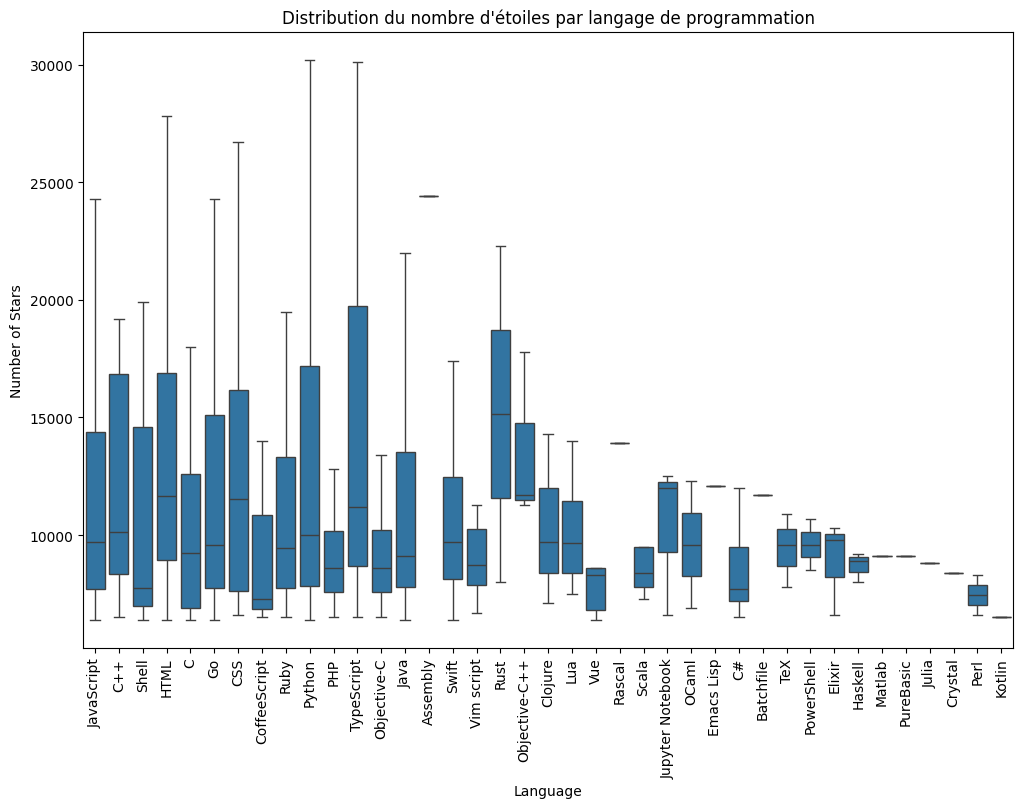

In [216]:
#17. Afficher la distribution du nombre d'étoiles par langage de programmation ne pas afficher les outliers
fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data = df, x= "Language", y = "Number of Stars", showfliers=False, ax =ax)
ax.tick_params(axis='x', rotation=90)
ax.set_title("Distribution du nombre d'étoiles par langage de programmation")
plt.show()

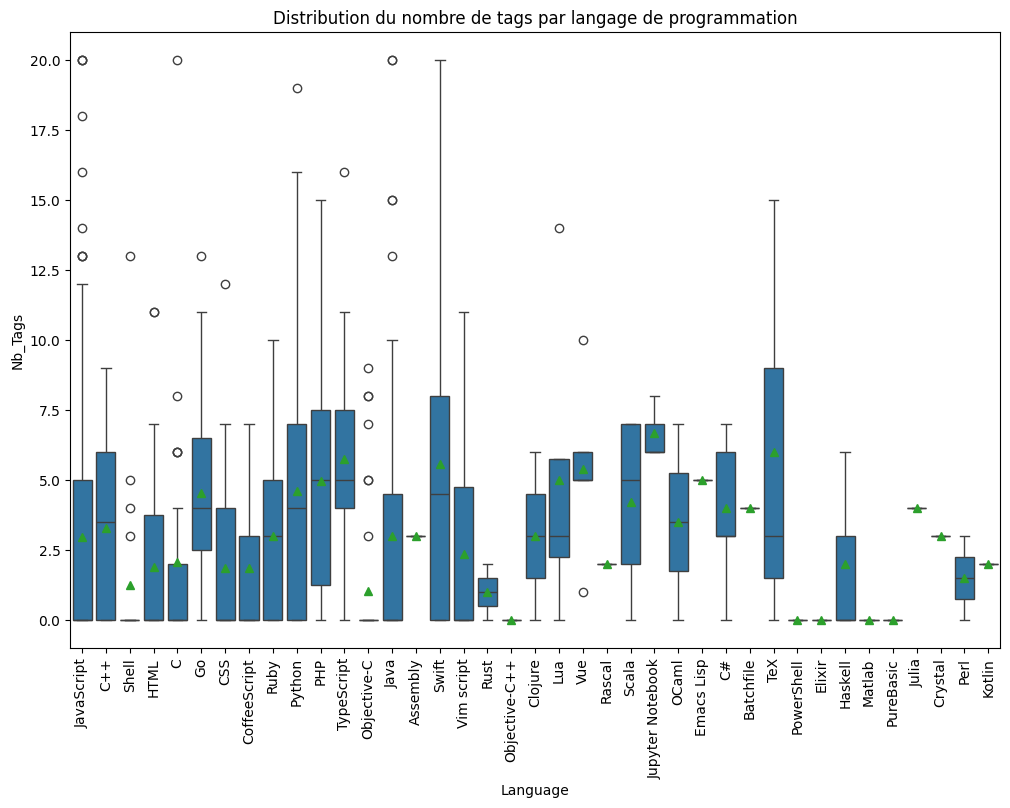

In [217]:
# 18. Afficher la distribution du nombre de tags par langage de programmation, affiche les outliers et la moyenne sur chaque boxplot
# Indice : Paramètres de la fonction boxplot() du module seaborn

fig, ax = plt.subplots(figsize = (12,8))
sns.boxplot(data = df, x= "Language", y = "Nb_Tags", showmeans = True, ax =ax)
ax.tick_params(axis='x', rotation=90)
ax.set_title("Distribution du nombre de tags par langage de programmation")
plt.show()

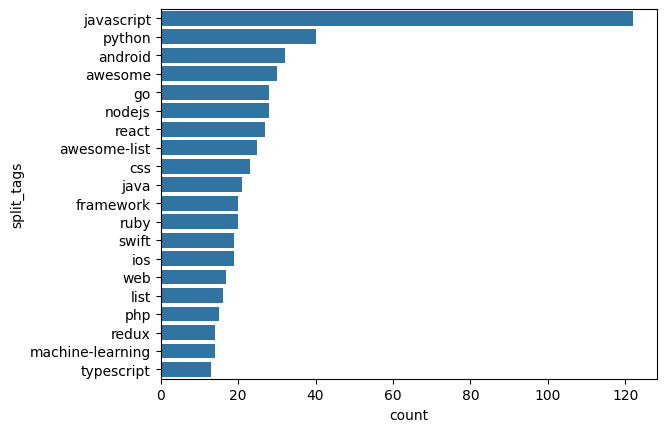

In [218]:
# 19. Afficher le top 20 des tags les plus utilisés a l'aide de barplot
exploding = df['split_tags'].explode().value_counts(ascending= False).head(20).reset_index()

sns.barplot(data=exploding, x='count', y='split_tags')
ax.set_title("Top 20 des tags les plus utilisés")

plt.show()

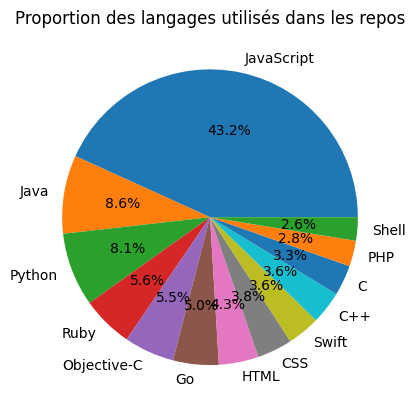

In [232]:
# 20. Afficher la proportion des langages utilisés dans les repos sous forme de graphique en camembert ou en anneau ne représenter que les langages qui ont une proportion supérieure à 2%

camembert = df['Language'].value_counts(normalize = True)
camembert_final = camembert[camembert > 0.02]

plt.pie(camembert_final,labels=camembert_final.index, autopct='%1.1f%%', )
plt.title("Proportion des langages utilisés dans les repos")
plt.show()

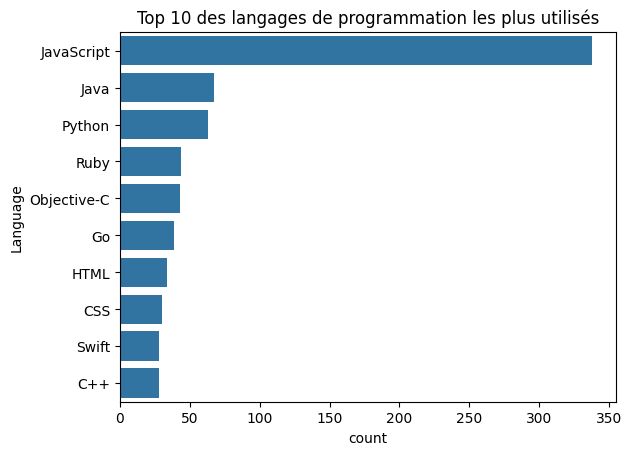

In [240]:
# 21. Afficher le top 10 des langages de programmation les plus utilisés sous forme de barplot
count_language = df['Language'].value_counts(ascending = False).reset_index().head(10)
count_language
sns.barplot(count_language,x= "count", y = "Language")
plt.title("Top 10 des langages de programmation les plus utilisés")

plt.show()

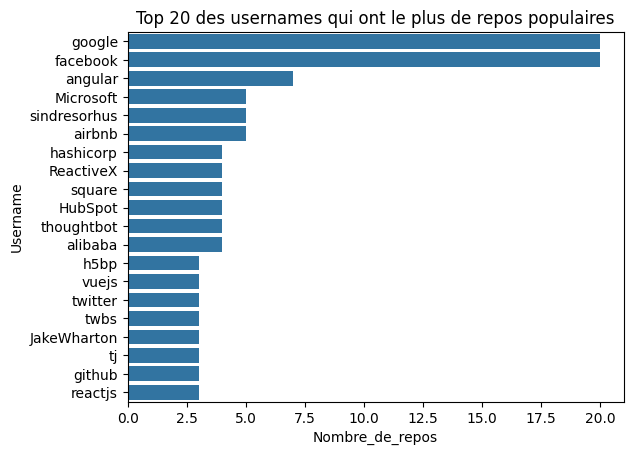

In [254]:
# 22. Afficher le top 20 des Usernames qui ont le plus de repos populaaires

top_20_username = df.groupby("Username")['Number of Stars'].size().reset_index(name='Nombre_de_repos').sort_values('Nombre_de_repos', ascending = False).head(20)

sns.barplot(data=top_20_username, x='Nombre_de_repos', y='Username')
plt.title("Top 20 des usernames qui ont le plus de repos populaires")


plt.show()